In [1]:
# Import required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
print("Dataset shape:", X.shape)
print("Number of classes:", len(set(y)))

Dataset shape: (1797, 64)
Number of classes: 10


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM (linear)": svm.SVC(kernel='linear'),
    "SVM (RBF)": svm.SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gaussian NB": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [7]:
# Train and evaluate each model
print("\nModel Accuracy Scores:")
accuracies = {}
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracies[name] = score
    print(f"{name:20s} --> Accuracy: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model = name

print(f"\n✅ Best model before tuning: {best_model} ({best_score:.4f})")


Model Accuracy Scores:
Logistic Regression  --> Accuracy: 0.9750
SVM (linear)         --> Accuracy: 0.9778
SVM (RBF)            --> Accuracy: 0.9861
Random Forest        --> Accuracy: 0.9722
Gaussian NB          --> Accuracy: 0.8472
Multinomial NB       --> Accuracy: 0.9111
Decision Tree        --> Accuracy: 0.8417

✅ Best model before tuning: SVM (RBF) (0.9861)


In [9]:
# Hyperparameter tuning using GridSearchCV
# Example 1: SVM (RBF kernel)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
print("\n--- SVM Hyperparameter Tuning ---")
print("Best parameters:", grid_svm.best_params_)
print("Best cross-validation score:", grid_svm.best_score_)
print("Test set accuracy:", grid_svm.score(X_test, y_test))

# Example 2: Random Forest tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("\n--- Random Forest Hyperparameter Tuning ---")
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)
print("Test set accuracy:", grid_rf.score(X_test, y_test))


--- SVM Hyperparameter Tuning ---
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.9895639759969029
Test set accuracy: 0.9888888888888889

--- Random Forest Hyperparameter Tuning ---
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}
Best cross-validation score: 0.974946767324816
Test set accuracy: 0.975


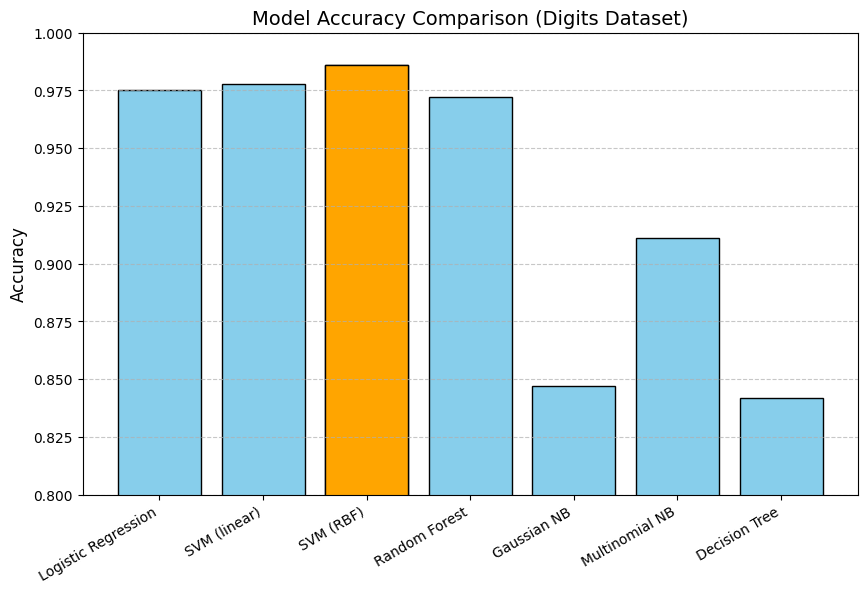

In [10]:
# Bar chart comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue', edgecolor='black')
plt.title("Model Accuracy Comparison (Digits Dataset)", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0.8, 1.0)

# Highlight best model in red
best_name = max(accuracies, key=accuracies.get)
plt.bar(best_name, accuracies[best_name], color='orange', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()